# 1. Import

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load data

In [2]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# 3. Explore the data

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 4. Clean the data

In [6]:
df = df.drop(['director','show_id'],axis=1)

In [7]:
df['cast'] = df['cast'].fillna('Unknown')

In [8]:
df['country'] = df['country'].fillna('Unknown')

In [9]:
df.dropna(subset=['date_added','rating','duration'], inplace=True)

In [10]:
df.isnull().sum()

type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [15]:
df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 5. Analyze

## i. Movies vs TV Shows

In [12]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [60]:
type_count = df['type'].value_counts()

Text(0, 0.5, 'count')

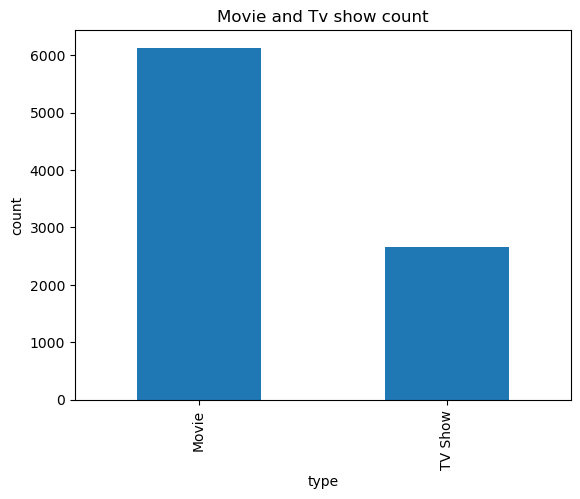

In [61]:
type_count.plot(kind='bar')
plt.title('Movie and Tv show count')
plt.xlabel('type')
plt.ylabel('count')

>Netflix has a larger collection of `Movies` compared to `Tv shows`.This shows that netflix content library **mainly focuses on movies**, though it is also has a good number of Tv shows.

## ii. Content over the Years

In [19]:
df['year_added'] = df['date_added'].dt.year

In [33]:
year_type_count = df.groupby(['year_added','type']).size().unstack(fill_value = 0)

In [34]:
year_type_count

type,Movie,TV Show
year_added,,
2008.0,1,1
2009.0,2,0
2010.0,1,0
2011.0,13,0
2012.0,3,0
2013.0,6,4
2014.0,19,4
2015.0,56,17
2016.0,251,164


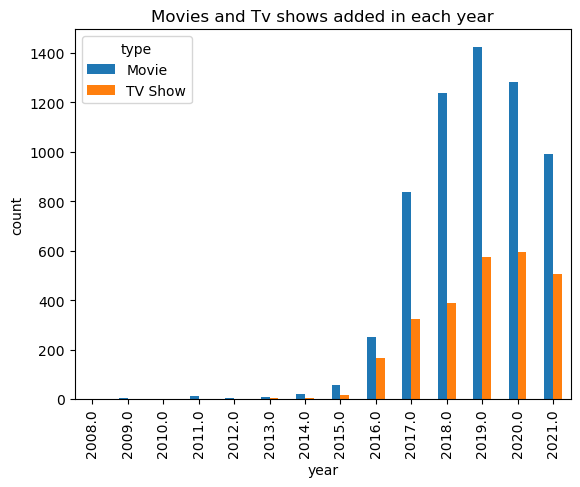

In [36]:
year_type_count.plot(kind='bar')
plt.title('Movies and Tv shows added in each year')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

>This shows that how netflix content additions changed over year. There is noticable **increase in both movies and tv shows around `2018-2020`**. In recent years number of additions decreased slightly.

## iii. Top Countries

In [39]:
df['country'].nunique()

749

In [44]:
df['country'].value_counts()

country
United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [45]:
df['country'].value_counts().max()

2809

>The majority of netflix content is from `United States`, showing that netflix's library is largely dominated by hollywood productions. However, countries like **India, United Kingdom** also contribute a significant amount of content.

## iv. Popular Genres

In [46]:
df['listed_in'].nunique()

513

In [47]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64


>This shows that `Dramas and International Movies` are the most popular genres on Netflix. Other frequently appearing genres include **Documentaries, Stand-Up Comedy, and Comedies**, indicating Netflix’s focus on offering a wide range of content for different audiences.

## v. Ratings

In [48]:
df['rating'].nunique()

14

In [49]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [50]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

>The majority of Netflix content is rated `TV-MA`, followed by `TV-14`. This indicates that Netflix **mainly targets mature and teenage audiences with content containing more adult themes**. Family-friendly content, such as TV-Y, TV-G, and PG-rated titles, makes up a smaller portion of the library, showing that **Netflix’s focus is more on mature storytelling than children’s programming**.

# Conclusion

According to the netflix movies and tv shows data analysis:
- Netflix has more **movies than tv shows**.
- Most content is added between `2018-2020`
- Top producing countries are `United States and India`
- Common genres are `Drama`, `Comedy`, and `International` Movies.
- Most content is rated `TV-MA`, suggesting mature audiences.